### mecab 설치

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-11-13 11:18:22--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-11-13 11:18:23--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce7b3a59ef15e93949afe95aa56.dl.dropboxusercontent.com/cd/0/get/BwqaF41FjpvqdMifsFzicvahaqzZl5Yy8zOG6r7qLeO_jgIMLOAcQtWlcKk95teMaj5mlDaWLt9GU4fsaqyTM-RoPcURw1l2RVkeFhcg7mj7kiHTxiA66KSCXR1WQAFu0QZgnV1sCe-taF3Z4Ok3yc8WO-xQuaGyIEma-8v53JinVEOS8Aujr8iPwmNfM6ncziI/file?dl=1# [following]
--2022-11-13 11:18:24--  https://uce7b3a59ef15e93949afe95aa56.dl.dropboxusercontent.com/cd/0/get/BwqaF41Fjpv

In [3]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab.morphs('안녕하세용')

['안녕', '하세용']

In [4]:
#tokenizer.word_counts

In [5]:
"""
tokenizer1 = Tokenizer()
tokenizer2 = Tokenizer()
tokenizer3 = Tokenizer()
tokenizer1.fit_on_texts(voice_noun_join)
tokenizer2.fit_on_texts(impersonation_noun_join)
tokenizer3.fit_on_texts(fraud_noun_join)
voice_count_desc = sorted(tokenizer1.word_counts, key = lambda x : x[1], reverse = True)
impersonation_count_desc = sorted(tokenizer2.word_counts, key = lambda x : x[1], reverse = True)
fraud_count_desc = sorted(tokenizer3.word_counts, key = lambda x : x[1], reverse = True)
"""

'\ntokenizer1 = Tokenizer()\ntokenizer2 = Tokenizer()\ntokenizer3 = Tokenizer()\ntokenizer1.fit_on_texts(voice_noun_join)\ntokenizer2.fit_on_texts(impersonation_noun_join)\ntokenizer3.fit_on_texts(fraud_noun_join)\nvoice_count_desc = sorted(tokenizer1.word_counts, key = lambda x : x[1], reverse = True)\nimpersonation_count_desc = sorted(tokenizer2.word_counts, key = lambda x : x[1], reverse = True)\nfraud_count_desc = sorted(tokenizer3.word_counts, key = lambda x : x[1], reverse = True)\n'

In [6]:
# 데이터 불러오기
"""
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/그놈목소리.txt', 'r', encoding='UTF8') as f :
  voice = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/수사기관사칭.txt', 'r', encoding='UTF8') as f :
  impersonation = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/은행사기.txt', 'r', encoding='UTF8') as f :
  fraud = f.readlines()

print(voice[:2])
print(impersonation[:2])
print(fraud[:2])
"""

"\nwith open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/그놈목소리.txt', 'r', encoding='UTF8') as f :\n  voice = f.readlines()\nwith open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/수사기관사칭.txt', 'r', encoding='UTF8') as f :\n  impersonation = f.readlines()\nwith open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/은행사기.txt', 'r', encoding='UTF8') as f :\n  fraud = f.readlines()\n\nprint(voice[:2])\nprint(impersonation[:2])\nprint(fraud[:2])\n"

### 키워드 정의, 데이터 전처리

In [7]:
keywords = list(set(['대포통장', '명의도용', '개인정보유출', '금융범죄', '수사관', '동결', '서울중앙지검', '신용카드', '피해자', '녹취',
            '방해죄', '해킹', '재판부', '고소', '재판', '수수료', '사기', '검찰', '체포영장', '신분증개설', '도난', '검찰청', '집행', '압수수색',
            '변호사', '피의자', '거래법', '개설', '보안', '영업', '경찰청', '검찰', 
            '수수료', '신용', '신용도', '입금',
            '금융', '저축', '은행', '대출', '상품', '수수료', '원리금', '분할', '상환', '만기', 
            '증명서', '고객', '자금', '신용', '통장', '캐피탈', '금리', '대출금', '한도', '담보']))

In [8]:
import random
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/all_df_with_tokens_according_to_topic.csv')
df.head()

,Unnamed: 0,sentence,tokens,cityCode,convrsThema,gender,age
0,0,밥 한끼를 제대로 된 밥 한끼를 먹을 수 있다고 생각하면서 감사하게 감사하게 생각하...,밥 끼 제대로 밥 끼 수 생각 생각 노후 제 가장 연예인 별 온 그대 전지현 잔디 ...,경상,방송/연예,여,60
1,1,그거 먹고 살아야 되는 거지 자식 물려줄 필요없고요 그걸로 모자라는 부분은 다른 곳...,그거 거지 자식 걸 부분 다른 곳 충당 백세 시대 요즘 자식 부모 자기 자기 자식 ...,경상,경제/재태크,여,60
2,2,결국 주차 요금을 올릴 수밖에 없어요 결국 최씨는 수리를 삼십일로 미뤄야 했습니다 ...,주차 요금 수 최씨 수리 삼십일 최종 결론 연말 퇴진 시점 알 수가 필자 인상 편이...,경상,PBS,여,60
3,3,저 사람이 나한테 저렇게 행동을 하는구나 저 사람이 원하는 게 무엇인가를 내가 생각...,저 사람 나 행동 저 사람 게 무엇 를 내 생각 사람 일이 생각 극 달 화가 내 좀...,기타,휴일,여,60
4,4,이 사람의 입장은 이럴 수 있구나 라고 배울 수 있는거지 그런건 정말 중요하고 꼭 ...,이 사람 입장 수 수 정말 꼭 것 친구 옛날 사람 손 맛 우리 쪽 다슬기 거 전혀 ...,기타,먹거리,여,60


In [9]:
# voice phishing 데이터 불러오고 전처리, 토큰화

with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/그놈목소리.txt', 'r', encoding='UTF8') as f :
  voice = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/수사기관사칭.txt', 'r', encoding='UTF8') as f :
  impersonation = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/은행사기.txt', 'r', encoding='UTF8') as f :
  fraud = f.readlines()

voice = [v[:-1] for v in voice]
impersonation = [m[:-1] for m in impersonation]
fraud = [f[:-1] for f in fraud]

#normal_all = random.sample(list(df['sentence']), 288)
#normal_train = random.sample(normal_all, 200)
#normal_test = [t for t in normal_all if t not in normal_train]

voice_phishing_all = voice + impersonation + fraud
#voice_phishing_train = random.sample(voice_phishing_all, 200)
#voice_phishing_test = [v for v in voice_phishing_all if v not in voice_phishing_train]

#print(len(normal_all))
#print(len(normal_train))
#print(len(normal_test))

print(len(voice_phishing_all))
#print(len(voice_phishing_train))
#print(len(voice_phishing_test))

288


In [10]:
# 보이스피싱 데이터 토큰화 후 한글자 제거 and 토큰이 30개 이하면 데이터에 넣지 않음

voice_phishing_all_token = [mecab.nouns(w) for w in voice_phishing_all]
#voice_phishing_train_token = [mecab.nouns(w) for w in voice_phishing_train]
#normal_train_token = [mecab.nouns(w) for w in normal_train]

#voice_phishing_test_token = [mecab.nouns(w) for w in voice_phishing_test]
#normal_test_token = [mecab.nouns(w) for w in normal_test]

tmp1 = []
for i in range(len(voice_phishing_all_token)) :
  tmp2 = []
  
  for j in range(len(voice_phishing_all_token[i])) :
    if len(voice_phishing_all_token[i][j]) != 1 :
      tmp2.append(voice_phishing_all_token[i][j])
    
  if len(tmp2) >= 30 :
    tmp1.append(tmp2)
voice_phishing_all_token = tmp1[:]

"""
tmp1 = []
for i in range(len(normal_train_token)) :
  tmp2 = []
  for j in range(len(normal_train_token[i])) :
    if len(normal_train_token[i][j]) != 1 :
      tmp2.append(normal_train_token[i][j])
  tmp1.append(tmp2)
normal_train_token = tmp1[:]

print(voice_phishing_train_token[0])
print(normal_train_token[0])

tmp1 = []
for i in range(len(voice_phishing_test_token)) :
  tmp2 = []
  for j in range(len(voice_phishing_test_token[i])) :
    if len(voice_phishing_test_token[i][j]) != 1 :
      tmp2.append(voice_phishing_test_token[i][j])
  tmp1.append(tmp2)
voice_phishing_test_token = tmp1[:]

tmp1 = []
for i in range(len(normal_test_token)) :
  tmp2 = []
  for j in range(len(normal_test_token[i])) :
    if len(normal_test_token[i][j]) != 1 :
      tmp2.append(normal_test_token[i][j])
  tmp1.append(tmp2)
normal_test_token = tmp1[:]

print(voice_phishing_test_token[0])
print(normal_test_token[0])
"""
print(len(voice_phishing_all_token))
print(voice_phishing_all_token)

216
[['방문', '금융', '어디', '구미', '형태', '형태', '진행', '형태', '상품', '겁니다', '전화', '오해', '전화', '원인', '본인', '통장', '제도', '김종호', '주범', '불법', '금전', '거래', '통장', '고의', '양도', '건지', '개인', '정보', '유출', '사용', '금융', '이메일', '번호', '저녁'], ['가지', '질문', '사건', '번호', '말씀', '수원시', '팔달구', '거주', '남성', '김태환', '저녁', '최근', '사이', '본인', '개인', '정보', '물품', '고난', '이메일', '이용', '이용', '해킹', '신정', '상황', '때문', '지금', '본인', '사용', '금융', '상호', '용도', '진주', '건데', '말씀', '본인', '계좌', '번호', '비밀', '번호', '개인', '정보', '말씀', '저희', '진술', '내용', '본인', '추가', '통장', '발견', '저희', '대포통장', '간주', '동결', '처리', '가지', '사용', '금융', '사고', '말씀', '진실', '건데', '사용', '상관', '휴먼', '계좌', '말씀', '본인', '본인', '본인', '명의', '금융', '본인', '본인', '금융', '핸드폰', '대리점', '판매처', '근무', '학생', '수원시', '팔달구', '남성', '김태환', '최근', '사이', '개인', '정보', '물건'], ['통화', '불편', '날짜', '메일', '확인', '김성호', '나이', '전라도', '광주', '실수', '김동원', '사람', '휴가', '이번', '상태', '사건', '사람', '현직', '은행', '직원', '이게', '전산', '문제', '발생', '저희', '전화', '이내', '본인', '신분증', '운전', '면허증', '개인', '정보', '심장', '이번', '확인', '저희', '사용', '걱정', '통장'

In [11]:
# 보이스피싱데이터 train, test 나누기
voice_phishing_train_token = random.sample(voice_phishing_all_token, 166)
voice_phishing_test_token = [v for v in voice_phishing_all_token if v not in voice_phishing_train_token]

print(len(voice_phishing_train_token))
print(len(voice_phishing_test_token))

166
50


In [12]:
# 일상대화 데이터에도 앞과 같은 단계 거치기
normal_all = random.sample(list(df['sentence']), 600) # 토큰화 이후 길이 30개 안되는것들 있을까봐 넉넉히 600개 뽑기
#normal_train = random.sample(normal_all, 200)
#normal_test = [t for t in normal_all if t not in normal_train]

In [13]:
# 일상대화 데이터 토큰화 후 한글자 제거 and 토큰이 30개 이하면 데이터에 넣지 않음
normal_all_token = [mecab.nouns(w) for w in normal_all]

tmp1 = []
for i in range(len(normal_all_token)) :
  tmp2 = []
  
  for j in range(len(normal_all_token[i])) :
    if len(normal_all_token[i][j]) != 1 :
      tmp2.append(normal_all_token[i][j])
    
  if len(tmp2) >= 30 :
    tmp1.append(tmp2)
normal_all_token = tmp1[:]
print(len(normal_all_token))
print(normal_all_token)

277
[['할아버지', '할아버지', '주실', '강도', '걸로', '직전', '테니스', '어깨', '티셔츠', '자연', '거기', '운동', '다섯', '다음', '스쿼시', '다음', '수영', '순위', '자전거', '아빠', '얘기', '필라테스', '공중', '건가', '대문', '광고지', '가격', '얼마', '얼마', '선물', '선물', '그거', '운동', '운동', '근력', '하나', '학교', '학년', '그게', '학년', '땐가', '우리', '엄마', '그것', '사륜구동', '사륜구동', '산악', '바이크', '그거', '예전', '우리', '바닷가', '산악', '액티비티', '그것', '나이', '그것', '일산', '일산', '거기', '서약서', '거기', '산악', '파주', '헤이리', '헤이리', '마을', '그쪽', '그게', '생각', '발통', '그때', '일어', '그때', '언니', '어른', '우리', '자전거', '느낌', '조금', '우리', '아파트', '단지', '바람', '그거', '연결', '어디', '신발', '씽씽이', '그게', '인도', '차도', '학교', '생각', '그거', '버스', '지하철', '그건', '아라', '다솜', '하나', '정도', '무게', '옛날', '씽씽이', '브레이크', '정도', '교통비', '우리', '학교', '교통비', '칠만', '이용', '그거', '우리', '고민', '그쪽', '우리', '베트남', '그쪽', '레저', '활동', '아홉', '시작', '걸로', '거기', '운동', '시간', '등산', '엄마', '도봉', '거기', '교통', '이후', '오른쪽', '무릎', '버릇', '누가', '그게', '민폐', '차산', '하나', '문제', '거기', '시멘트', '길이', '연령', '생각', '할머니', '예전', '성실', '행동', '우리', '나라', '사람', '행동', '자체', '이해', '비교', '생각',

In [14]:
# 일상대화 데이터 train, test 나누기
normal_train_token = random.sample(normal_all_token, 166)
normal_test_token = [v for v in normal_all_token if v not in normal_train_token]
normal_test_token = random.sample(normal_test_token, 50)
print(len(normal_train_token))
print(len(normal_test_token))

166
50


In [ ]:
# 불용어 추출 (train만 사용)
phishing_vocab = {}
normal_vocab = {}

for i in voice_phishing_train_token :
  for j in i :
    if j in phishing_vocab :
      phishing_vocab[j] += 1
    else :
      phishing_vocab[j] = 1

for i in normal_train_token :
  for j in i :
    if j in normal_vocab :
      normal_vocab[j] += 1
    else :
      normal_vocab[j] = 1

def extract_duplicate_word(vocab1, vocab2, threshold) :
  result = []
  for i in phishing_vocab :
      if i in normal_vocab :
        if phishing_vocab[i] >= threshold and normal_vocab[i] >= threshold :
          result.append([i, phishing_vocab[i], normal_vocab[i]])
  return result

#extract_duplicate_word(phishing_vocab, normal_vocab, 30)
stop_words = [t[0] for t in extract_duplicate_word(phishing_vocab, normal_vocab, 30)]
stop_words

In [16]:
# 불용어 제거 (train, test 모두)
tmp1 = []
for i in range(len(voice_phishing_train_token)) :
  tmp2 = []
  for j in range(len(voice_phishing_train_token[i])) :
    if voice_phishing_train_token[i][j] not in stop_words or voice_phishing_train_token[i][j] in keywords :
      tmp2.append(voice_phishing_train_token[i][j])
  tmp1.append(tmp2)
voice_phishing_train_token = tmp1[:]

tmp1 = []
for i in range(len(voice_phishing_test_token)) :
  tmp2 = []
  for j in range(len(voice_phishing_test_token[i])) :
    if voice_phishing_test_token[i][j] not in stop_words or voice_phishing_test_token[i][j] in keywords :
      tmp2.append(voice_phishing_test_token[i][j])
  tmp1.append(tmp2)
voice_phishing_test_token = tmp1[:]

tmp1 = []
for i in range(len(normal_train_token)) :
  tmp2 = []
  for j in range(len(normal_train_token[i])) :
    if normal_train_token[i][j] not in stop_words or normal_train_token[i][j] in keywords :
      tmp2.append(normal_train_token[i][j])
  tmp1.append(tmp2)
normal_train_token = tmp1[:]

tmp1 = []
for i in range(len(normal_test_token)) :
  tmp2 = []
  for j in range(len(normal_test_token[i])) :
    if normal_test_token[i][j] not in stop_words or normal_test_token[i][j] in keywords :
      tmp2.append(normal_test_token[i][j])
  tmp1.append(tmp2)
normal_test_token = tmp1[:]

In [17]:
# 비어있는 리스트 삭제
voice_phishing_train_token = [a for a in voice_phishing_train_token if len(a) != 0]
voice_phishing_test_token = [a for a in voice_phishing_test_token if len(a) != 0]
normal_train_token = [a for a in normal_train_token if len(a) != 0]
normal_test_token = [a for a in normal_test_token if len(a) != 0]

print(len(voice_phishing_train_token))
print(len(voice_phishing_test_token))
print(len(normal_train_token))
print(len(normal_test_token))

166
50
166
50


### 모델링 시작

In [ ]:
!pip install --upgrade gensim==3.8.0

In [ ]:
from gensim import models

ko_model = models.fasttext.load_facebook_model('/content/drive/MyDrive/Colab Notebooks/FastText_pretrained/cc.ko.300.bin')

In [20]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

#### MAX2를 EWMA 해보기. (맨앞에 0 안넣음)

In [21]:
def EWMA(target, alpha) : 
  target_ = target[:]
  ewma = [target_[0]] # 초기값
  
  for i in range(1, len(target_)) :
    val = (1-alpha) * ewma[i-1] + alpha * target_[i] 
    ewma.append(val)
  
  return ewma
  

In [22]:
def detection_window(target, keywords, model, window_size=10, max_n=2) :
  target_sim = []
  keywords_vect = []
  for i in range(len(keywords)) :
    keywords_vect.append(model[keywords[i]])

  for i in range(len(target)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(model[target[i]], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  result = []
  for i in range(len(target_sim) - window_size + 1) :
    w_sim = target_sim[i:i+window_size]
    w_desc = sorted(w_sim, reverse=True)
    w_top = w_desc[:max_n]
    result.append(sum(w_top)/max_n)
  return result

In [23]:
def evaluate(voice_phishing, normal, threshold, count) :
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(voice_phishing)) :
    cnt = 0
    for j in range(len(voice_phishing[i])) :
      if voice_phishing[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      TP += 1
    else :
      FN += 1

  for i in range(len(normal)) :
    cnt = 0
    for j in range(len(normal[i])) :
      if normal[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      FP += 1
    else :
      TN += 1
  
  return {'Acc' : (TP + TN) / (TP + TN + FP + FN), 'Recall' : TP / (TP + FN), 'Precision' : TP / (TP + FP)}

In [ ]:
window_voice_phishing_train_max2_EWMA_no0_ = []
window_normal_train_max2_EWMA_no0_ = []

for i in range(len(normal_train_token)) :
  window_normal_train_max2_EWMA_no0_.append(detection_window(normal_train_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_train_token)) :
  window_voice_phishing_train_max2_EWMA_no0_.append(detection_window(voice_phishing_train_token[i], keywords, ko_model, 10, 2))

In [108]:
window_normal_train_max2_EWMA_no0 = [EWMA(e, 0.01) for e in window_normal_train_max2_EWMA_no0_ if len(e) != 0]
window_voice_phishing_train_max2_EWMA_no0 = [EWMA(e, 0.01) for e in window_voice_phishing_train_max2_EWMA_no0_ if len(e) != 0]

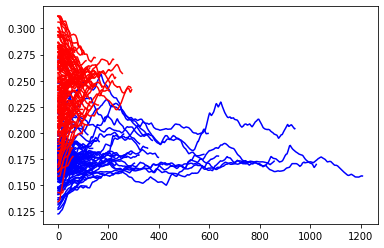

In [109]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_train_max2_EWMA_no0)) :
  plt.plot(window_normal_train_max2_EWMA_no0[i], 'b-')

for i in range(len(window_voice_phishing_train_max2_EWMA_no0)) :
  plt.plot(window_voice_phishing_train_max2_EWMA_no0[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [110]:
evaluate(window_voice_phishing_train_max2_EWMA_no0, window_normal_train_max2_EWMA_no0, 0.225, 1)

{'Acc': 0.8704819277108434,
 'Recall': 0.8072289156626506,
 'Precision': 0.9241379310344827}

In [ ]:
window_voice_phishing_test_max2_EWMA_no0_ = []
window_normal_test_max2_EWMA_no0_ = []

for i in range(len(normal_test_token)) :
  window_normal_test_max2_EWMA_no0_.append(detection_window(normal_test_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_test_token)) :
  window_voice_phishing_test_max2_EWMA_no0_.append(detection_window(voice_phishing_test_token[i], keywords, ko_model, 10, 2))

In [112]:
window_normal_test_max2_EWMA_no0 = [EWMA(e, 0.01) for e in window_normal_test_max2_EWMA_no0_ if len(e) != 0]
window_voice_phishing_test_max2_EWMA_no0 = [EWMA(e, 0.01) for e in window_voice_phishing_test_max2_EWMA_no0_ if len(e) != 0]

In [113]:
print(len(window_normal_train_max2_EWMA_no0))
print(len(window_voice_phishing_train_max2_EWMA_no0))

166
166


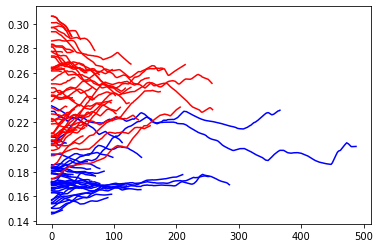

In [115]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_test_max2_EWMA_no0)) :
  plt.plot(window_normal_test_max2_EWMA_no0[i], 'b-')

for i in range(len(window_voice_phishing_test_max2_EWMA_no0)) :
  plt.plot(window_voice_phishing_test_max2_EWMA_no0[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [32]:
evaluate(window_voice_phishing_test_max2_EWMA_no0, window_normal_test_max2_EWMA_no0, 0.225, 1)

{'Acc': 0.9, 'Recall': 0.88, 'Precision': 0.9166666666666666}

#### MAX2를 EWMA 해보기. (EWMA 초기값으로 맨앞에 0같은 지정값 넣음)

In [118]:
def EWMA_pre_val(target, alpha, val) : 
  target_ = target[:]
  ewma = [val] # 초기값
  
  for i in range(len(target_)) :
    val = (1-alpha) * ewma[i] + alpha * target_[i] 
    ewma.append(val)
  
  return ewma
  

In [60]:
def detection_window(target, keywords, model, window_size=10, max_n=2) :
  target_sim = []
  keywords_vect = []
  for i in range(len(keywords)) :
    keywords_vect.append(model[keywords[i]])

  for i in range(len(target)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(model[target[i]], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  result = []
  for i in range(len(target_sim) - window_size + 1) :
    w_sim = target_sim[i:i+window_size]
    w_desc = sorted(w_sim, reverse=True)
    w_top = w_desc[:max_n]
    result.append(sum(w_top)/max_n)
  return result

In [61]:
def evaluate(voice_phishing, normal, threshold, count) :
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(voice_phishing)) :
    cnt = 0
    for j in range(len(voice_phishing[i])) :
      if voice_phishing[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      TP += 1
    else :
      FN += 1

  for i in range(len(normal)) :
    cnt = 0
    for j in range(len(normal[i])) :
      if normal[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      FP += 1
    else :
      TN += 1
  
  return {'Acc' : (TP + TN) / (TP + TN + FP + FN), 'Recall' : TP / (TP + FN), 'Precision' : TP / (TP + FP)}

In [ ]:
window_voice_phishing_train_max2_EWMA_yes0_ = []
window_normal_train_max2_EWMA_yes0_ = []

for i in range(len(normal_train_token)) :
  window_normal_train_max2_EWMA_yes0_.append(detection_window(normal_train_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_train_token)) :
  window_voice_phishing_train_max2_EWMA_yes0_.append(detection_window(voice_phishing_train_token[i], keywords, ko_model, 10, 2))

In [123]:
window_normal_train_max2_EWMA_yes0 = []
window_voice_phishing_train_max2_EWMA_yes0 = []

for i in range(len(window_normal_train_max2_EWMA_yes0_)) :
  if len(window_normal_train_max2_EWMA_yes0_[i]) != 0 :
    window_normal_train_max2_EWMA_yes0.append(EWMA_pre_val(window_normal_train_max2_EWMA_yes0_[i], 0.01, 0.2))

for i in range(len(window_voice_phishing_train_max2_EWMA_yes0_)) :
  if len(window_voice_phishing_train_max2_EWMA_yes0_[i]) != 0 :
    window_voice_phishing_train_max2_EWMA_yes0.append(EWMA_pre_val(window_voice_phishing_train_max2_EWMA_yes0_[i], 0.01, 0.2))

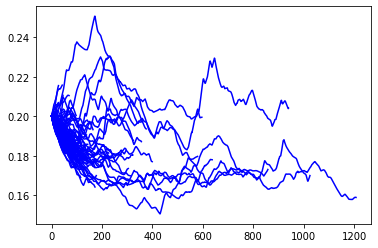

In [129]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_train_max2_EWMA_yes0)) :
  plt.plot(window_normal_train_max2_EWMA_yes0[i], 'b-')

#for i in range(len(window_voice_phishing_train_max2_EWMA_yes0)) :
#  plt.plot(window_voice_phishing_train_max2_EWMA_yes0[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [127]:
evaluate(window_voice_phishing_train_max2_EWMA_yes0, window_normal_train_max2_EWMA_yes0, 0.21, 1)

{'Acc': 0.8795180722891566,
 'Recall': 0.8072289156626506,
 'Precision': 0.9436619718309859}

In [66]:
print(len(window_voice_phishing_train_max2_EWMA_yes0))
print(len(window_normal_train_max2_EWMA_yes0))

166
166


#### MAX2를 EWMA 해보기. (EWMA 초기값으로 맨앞에 평균값 넣음)

In [67]:
def calculate_init_value(voice_phishing, normal) :
  voice_phishing_first_value = [v[0] for v in voice_phishing if len(v) != 0]
  normal_first_value = [n[0] for n in normal if len(n) != 0]
  voice_avg = sum(voice_phishing_first_value) / len(voice_phishing_first_value)
  normal_avg = sum(normal_first_value) / len(normal_first_value)

  return (voice_avg + normal_avg) / 2

In [68]:
def EWMA_pre_value(target, alpha, value) : 
  target_ = target[:]
  ewma = [value] # 초기값
  
  for i in range(len(target_)) :
    val = (1-alpha) * ewma[i] + alpha * target_[i] 
    ewma.append(val)
  
  return ewma
  

In [69]:
def detection_window(target, keywords, model, window_size=10, max_n=2) :
  target_sim = []
  keywords_vect = []
  for i in range(len(keywords)) :
    keywords_vect.append(model[keywords[i]])

  for i in range(len(target)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(model[target[i]], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  result = []
  for i in range(len(target_sim) - window_size + 1) :
    w_sim = target_sim[i:i+window_size]
    w_desc = sorted(w_sim, reverse=True)
    w_top = w_desc[:max_n]
    result.append(sum(w_top)/max_n)
  return result

In [70]:
def evaluate(voice_phishing, normal, threshold, count) :
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(voice_phishing)) :
    cnt = 0
    for j in range(len(voice_phishing[i])) :
      if voice_phishing[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      TP += 1
    else :
      FN += 1

  for i in range(len(normal)) :
    cnt = 0
    for j in range(len(normal[i])) :
      if normal[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      FP += 1
    else :
      TN += 1
  
  return {'Acc' : (TP + TN) / (TP + TN + FP + FN), 'Recall' : TP / (TP + FN), 'Precision' : TP / (TP + FP)}

In [ ]:
window_voice_phishing_train_max2_EWMA_yes_value_ = []
window_normal_train_max2_EWMA_yes_value_ = []

for i in range(len(normal_train_token)) :
  window_normal_train_max2_EWMA_yes_value_.append(detection_window(normal_train_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_train_token)) :
  window_voice_phishing_train_max2_EWMA_yes_value_.append(detection_window(voice_phishing_train_token[i], keywords, ko_model, 10, 2))

In [134]:
init_value = calculate_init_value(window_voice_phishing_train_max2_EWMA_yes_value_, window_normal_train_max2_EWMA_yes_value_)
print(init_value)

0.20860156159852278


In [135]:
window_normal_train_max2_EWMA_yes_value = []
window_voice_phishing_train_max2_EWMA_yes_value = []
for i in range(len(window_normal_train_max2_EWMA_yes_value_)) :
  if len(window_normal_train_max2_EWMA_yes_value_[i]) != 0 :
    window_normal_train_max2_EWMA_yes_value.append(EWMA_pre_value(window_normal_train_max2_EWMA_yes_value_[i], 0.03, init_value))

for i in range(len(window_voice_phishing_train_max2_EWMA_yes_value_)) :
  if len(window_voice_phishing_train_max2_EWMA_yes_value_[i]) != 0 :
    window_voice_phishing_train_max2_EWMA_yes_value.append( EWMA_pre_value(window_voice_phishing_train_max2_EWMA_yes_value_[i], 0.03, init_value))

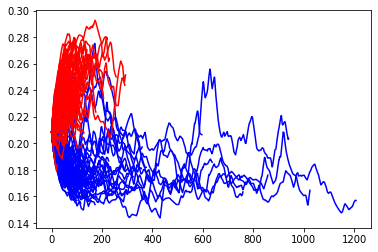

In [136]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_train_max2_EWMA_yes_value)) :
  plt.plot(window_normal_train_max2_EWMA_yes_value[i], 'b-')

for i in range(len(window_voice_phishing_train_max2_EWMA_yes_value)) :
  plt.plot(window_voice_phishing_train_max2_EWMA_yes_value[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [137]:
evaluate(window_voice_phishing_train_max2_EWMA_yes_value, window_normal_train_max2_EWMA_yes_value, 0.22, 1)

{'Acc': 0.9186746987951807,
 'Recall': 0.9036144578313253,
 'Precision': 0.9316770186335404}

#### MAX2를 EWMA 해보기. (EWMA 초기값으로 맨앞에 평균값 넣음) 이후 증감을 계속 평균내기
##### 여기있는 calculate_init_value_ 는 n이 들어감. 몇개를 고려할것인지

In [93]:
def calculate_init_value_(voice_phishing, normal, n=1) :
  voice_phishing_first_value = [v[:n] for v in voice_phishing if len(v) != 0]
  normal_first_value = [o[:n] for o in normal if len(o) != 0]
  
  voice_avg_tmp = [sum(t)/len(t) for t in voice_phishing_first_value]
  normal_avg_tmp = [sum(t)/len(t) for t in normal_first_value]


  voice_avg = sum(voice_avg_tmp) / len(voice_avg_tmp)
  normal_avg = sum(normal_avg_tmp) / len(normal_avg_tmp)

  return (voice_avg + normal_avg) / 2

In [80]:
def EWMA_pre_value(target, alpha, value) : 
  target_ = target[:]
  ewma = [value] # 초기값
  
  for i in range(len(target_)) :
    val = (1-alpha) * ewma[i] + alpha * target_[i] 
    ewma.append(val)
  
  return ewma
  

In [81]:
def detection_window(target, keywords, model, window_size=10, max_n=2) :
  target_sim = []
  keywords_vect = []
  for i in range(len(keywords)) :
    keywords_vect.append(model[keywords[i]])

  for i in range(len(target)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(model[target[i]], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  result = []
  for i in range(len(target_sim) - window_size + 1) :
    w_sim = target_sim[i:i+window_size]
    w_desc = sorted(w_sim, reverse=True)
    w_top = w_desc[:max_n]
    result.append(sum(w_top)/max_n)
  return result

In [ ]:
def evaluate(voice_phishing, normal, threshold, count) :
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(voice_phishing)) :
    cnt = 0
    for j in range(len(voice_phishing[i])) :
      if voice_phishing[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      TP += 1
    else :
      FN += 1

  for i in range(len(normal)) :
    cnt = 0
    for j in range(len(normal[i])) :
      if normal[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      FP += 1
    else :
      TN += 1
  
  return {'Acc' : (TP + TN) / (TP + TN + FP + FN), 'Recall' : TP / (TP + FN), 'Precision' : TP / (TP + FP)}

In [ ]:
window_voice_phishing_train_max2_EWMA_yes_value_updown_ = []
window_normal_train_max2_EWMA_yes_value_updown_ = []

for i in range(len(normal_train_token)) :
  window_normal_train_max2_EWMA_yes_value_updown_.append(detection_window(normal_train_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_train_token)) :
  window_voice_phishing_train_max2_EWMA_yes_value_updown_.append(detection_window(voice_phishing_train_token[i], keywords, ko_model, 10, 2))

In [96]:
init_value = calculate_init_value_(window_voice_phishing_train_max2_EWMA_yes_value_updown_, window_normal_train_max2_EWMA_yes_value_updown_, 5)
print(init_value)

0.20951959472893056


In [97]:
window_normal_train_max2_EWMA_yes_value_updown = []
window_voice_phishing_train_max2_EWMA_yes_value_updown = []
for i in range(len(window_normal_train_max2_EWMA_yes_value_updown_)) :
  if len(window_normal_train_max2_EWMA_yes_value_updown_[i]) != 0 :
    window_normal_train_max2_EWMA_yes_value_updown.append(EWMA_pre_value(window_normal_train_max2_EWMA_yes_value_updown_[i], 0.02, init_value))

for i in range(len(window_voice_phishing_train_max2_EWMA_yes_value_updown_)) :
  if len(window_voice_phishing_train_max2_EWMA_yes_value_updown_[i]) != 0 :
    window_voice_phishing_train_max2_EWMA_yes_value_updown.append( EWMA_pre_value(window_voice_phishing_train_max2_EWMA_yes_value_updown_[i], 0.02, init_value))

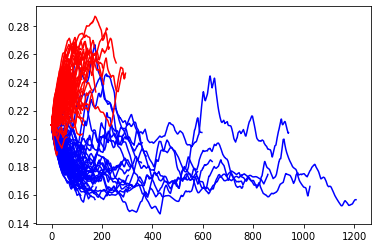

In [98]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_train_max2_EWMA_yes_value_updown)) :
  plt.plot(window_normal_train_max2_EWMA_yes_value_updown[i], 'b-')

for i in range(len(window_voice_phishing_train_max2_EWMA_yes_value_updown)) :
  plt.plot(window_voice_phishing_train_max2_EWMA_yes_value_updown[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [102]:
window_normal_train_max2_EWMA_yes_value_updown_avg = [] # 증감을 계속 평균
window_voice_phishing_train_max2_EWMA_yes_value_updown_avg = [] # 증감을 계속 평균

for i in range(len(window_normal_train_max2_EWMA_yes_value_updown)) :
  tmp = [0]
  for j in range(len(window_normal_train_max2_EWMA_yes_value_updown[i]) - 1) :
    diff = (window_normal_train_max2_EWMA_yes_value_updown[i][j+1] - window_normal_train_max2_EWMA_yes_value_updown[i][j])
    tmp.append((diff + tmp[j])/2)
  window_normal_train_max2_EWMA_yes_value_updown_avg.append(tmp)
print(window_normal_train_max2_EWMA_yes_value_updown_avg[0])

for i in range(len(window_voice_phishing_train_max2_EWMA_yes_value_updown)) :
  tmp = [0]
  for j in range(len(window_voice_phishing_train_max2_EWMA_yes_value_updown[i]) - 1) :
    diff = (window_voice_phishing_train_max2_EWMA_yes_value_updown[i][j+1] - window_voice_phishing_train_max2_EWMA_yes_value_updown[i][j])
    tmp.append((diff + tmp[j])/2)
  window_voice_phishing_train_max2_EWMA_yes_value_updown_avg.append(tmp)
print(window_voice_phishing_train_max2_EWMA_yes_value_updown_avg[0])


[0, -0.0004256148477864291, -0.0006299099747239176, -0.0007237154871760458, -0.0007624430334058265, -0.0007737951007243627, -0.0007765456002797023, -0.0007160506265535538, -0.0006430778113877539, -0.0006008903538426422, -0.0005846511906918704, -0.0005708474888410642, -0.00040298782252484733, -0.00031670670780466204, -0.0002712618945137149, -0.00024628131705602477, -0.0002315780209311922, -0.00022205762562071008, -0.000240600144599474, -0.00024727997745306357, -0.00024808029577679544, -0.00024599164879766526, -0.0006345561752700339, -0.0008186072314887878, -0.0007819498902617515, -0.0010035704794544547, -0.0008541903769482259, -0.0007208411449072937, -0.0006482916097581625, -0.0005296478991568298, -0.00046621600197061127, -0.00043047221232965586, -0.0004086530332822959, -0.00039387510521626487, -0.00038269516941174923, -0.00037339004917341575, -0.0003781500860969146, -0.0003767010033284624, -0.00037222394273864537, -0.0005056157774653448, -0.0005659216187067712, -0.0005898122647279955, 

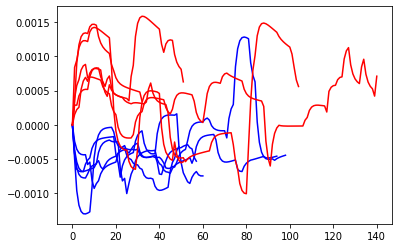

In [105]:
for i in range(5) :
  plt.plot(window_normal_train_max2_EWMA_yes_value_updown_avg[i], 'b-')

for i in range(5) :
  plt.plot(window_voice_phishing_train_max2_EWMA_yes_value_updown_avg[i], 'r-')

In [ ]:
# 실패!!